# Сборный проект №1.
## Аналитика для магазина "Стримчик"

### План работы:
1. импортируем нужные инструменты и саму базу данных для анализа.
2. Подготовка данных:
    * Привести названия столбцов к нижнему регистру
    * Обработка пропусков
    * Привести все данные к необходимому типу данных
    * Добавить столбец по суммарным продажам по регионам мира
3. Исследовательский анализ данных:
    * Сколько игр выходила по годам
    * Динамика продаж по платформам
    * Определение актуального периода
    * Поиск платформ-лидеров
        * Box-plot по продажам игр по платформам
        * Влияние рейтинга игроков и критиков для игр на разных платформах
    * Распределение игр по жанрам
4. Портреты пользователей для регионов мира (Европа, Северная Америка, Япония).
    * Популярные платформы
    * Популярные жанры
    * Определение влияния рейтинга ESRB на продажи игр в регионах.
5. Гипотезы.
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2. редние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Вывод.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import seaborn as sns

## Шаг 1. Импорт базы данных и необходимых инструментов.

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Шаг 2. Предработка данных.

In [5]:
#Нижний регистр
data.columns = data.columns.str.lower()

In [6]:
# Подсчет количества NaN - значений во всех столбцах
data.isna().sum(axis=0)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обработаем пропуски:
1. по 2 пропуска в name и genre - удалим, ничего страшного не случится.
2. в year realise замению всё на ноль, заменить тип для удобства нужно, ноль это универсальное значение игр, которые вышли когда-то.
3. user_score и critic_score - заменю на -1, т.к. оценку ноль поставить еще можно, а -1 нет.
    * tbd - To Be Determined - "будет определено", поэтому на -1 тоже можно заменить, может после этого анализа кто-то да выставит оценки. И вообще тот же самый Nan, так что заменям и не переживаем.
4. в rating на no rating, т.е. неизвестно на момент анализа, да и игры могут быть старые - уже не оценят в современных оценках.

In [7]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
data['rating'] = data['rating'].fillna('no rating')
data['genre'] = data['genre'].fillna('no genre')
data['name'] = data['name'].fillna('no name')

In [8]:
data.isna().sum(axis=0)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [9]:
# Суммарные продажи по регионам:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [10]:
display(data.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no rating,28.31


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
sales_total        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


 ## Шаг 3. Исследовательский анализ.

### Игры по годам.


<function matplotlib.pyplot.show(*args, **kw)>

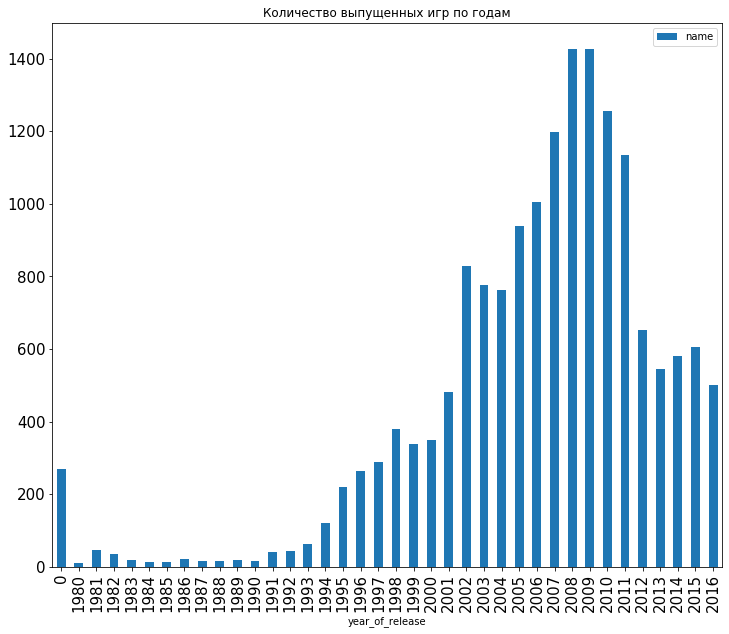

In [12]:
(data
    .pivot_table(index='year_of_release', values=['name'], aggfunc = 'count')
    .sort_values(by='year_of_release', ascending=True)
    .plot(kind='bar',figsize=(12, 10), fontsize=15)
)
plt.title('Количество выпущенных игр по годам')

plt.show

### Продажи по платформам.

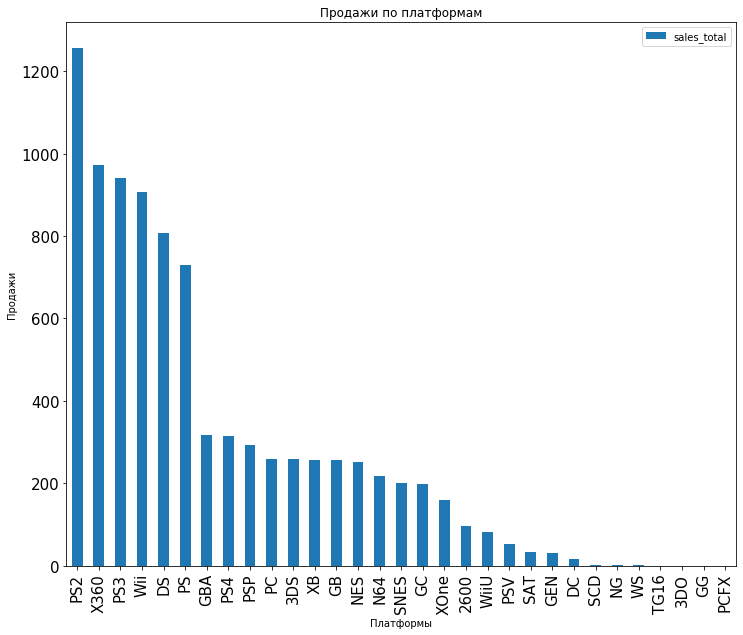

In [13]:
(data
    .pivot_table(index='platform', values='sales_total', aggfunc='sum')
    .sort_values(by='sales_total', ascending=False)
    .plot(kind='bar',figsize=(12, 10), fontsize=15)
)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

In [14]:
data.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<function matplotlib.pyplot.show(*args, **kw)>

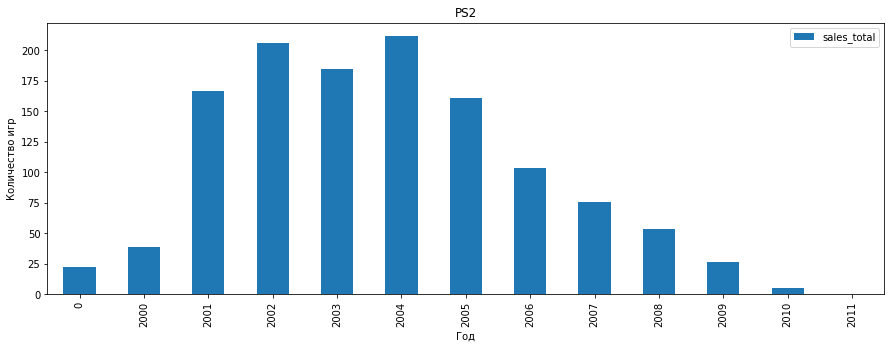

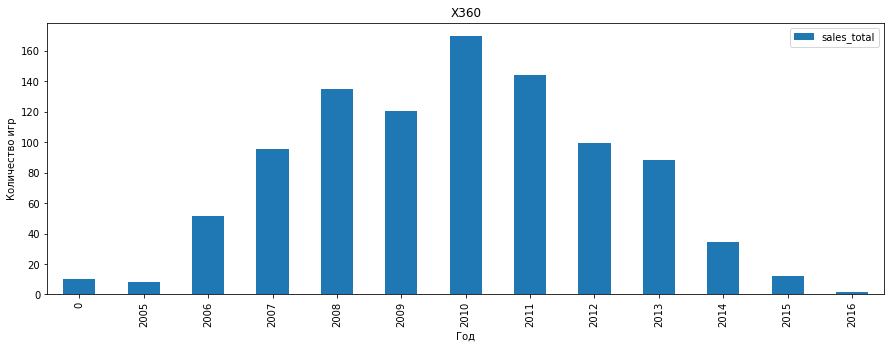

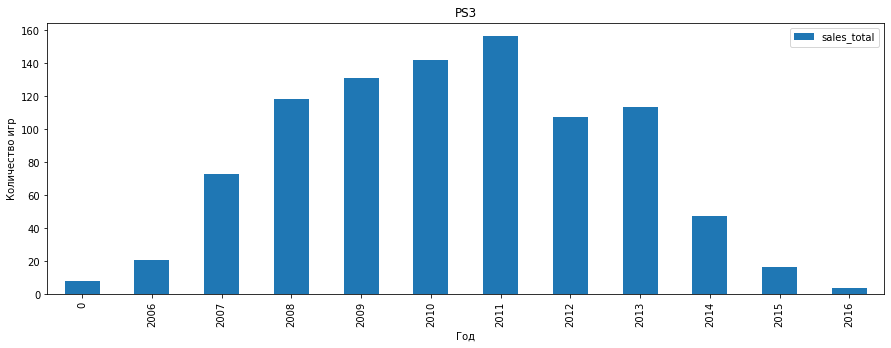

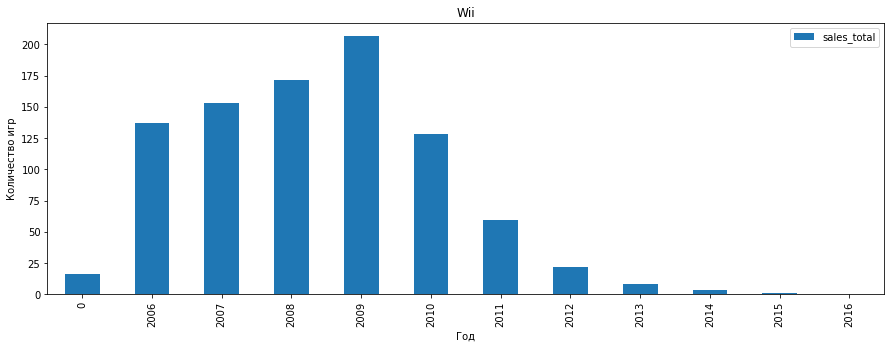

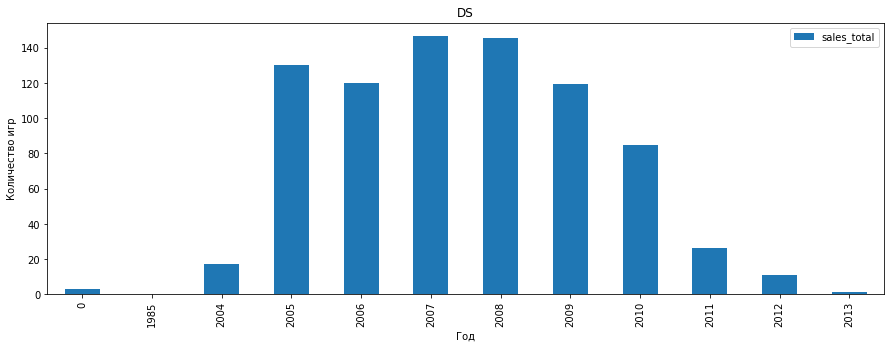

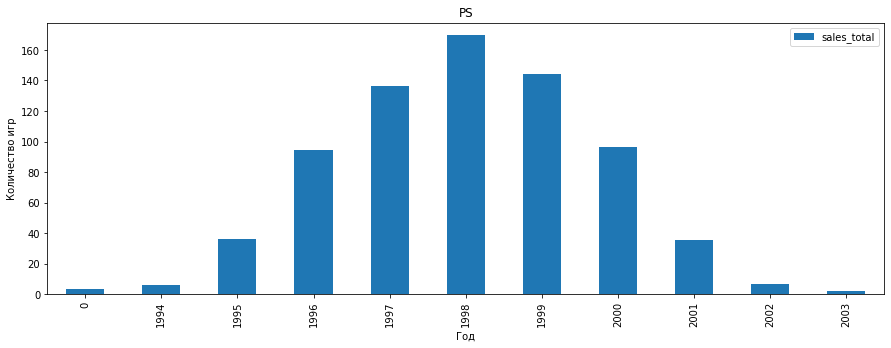

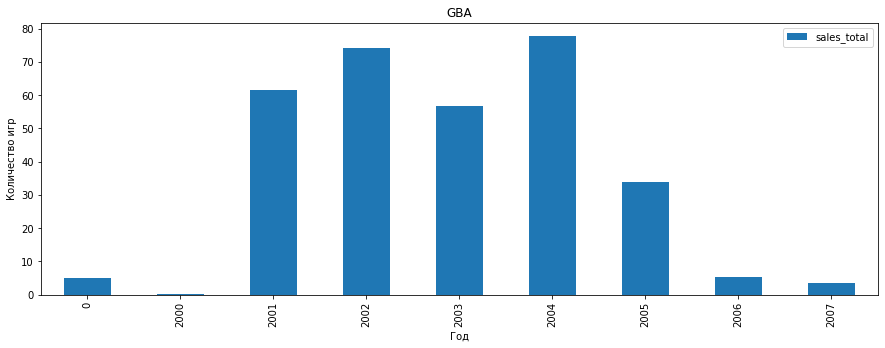

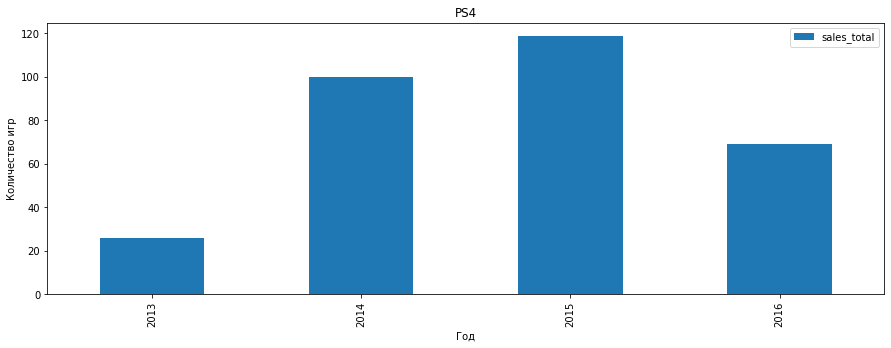

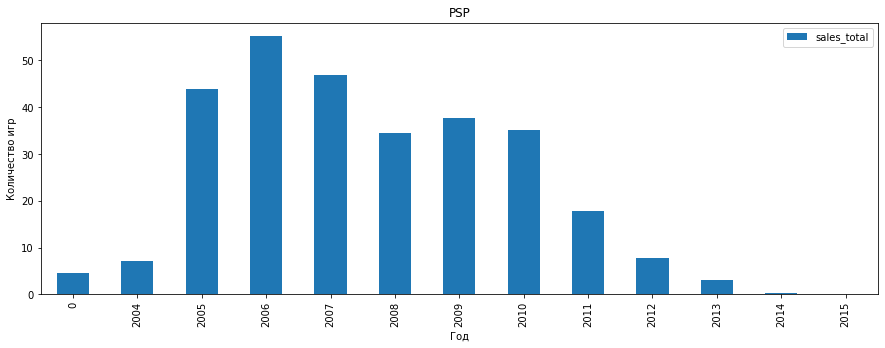

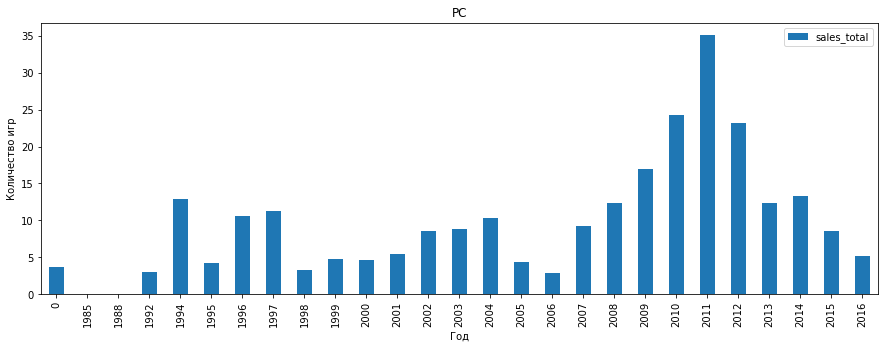

In [15]:
platform_grouped = data.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(
    by='sales_total', ascending=False)
platform_grouped = platform_grouped.head(10).reset_index()
top_platforms = platform_grouped['platform'].unique()
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales_total', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Количество игр')
plt.show

### Актуальный период:

In [16]:
actual_data = data.query('year_of_release > 2006')

actual_2016_pvt = actual_data.pivot_table(index=['platform'], values='sales_total', aggfunc='sum').reset_index().sort_values(by='sales_total', ascending=False)

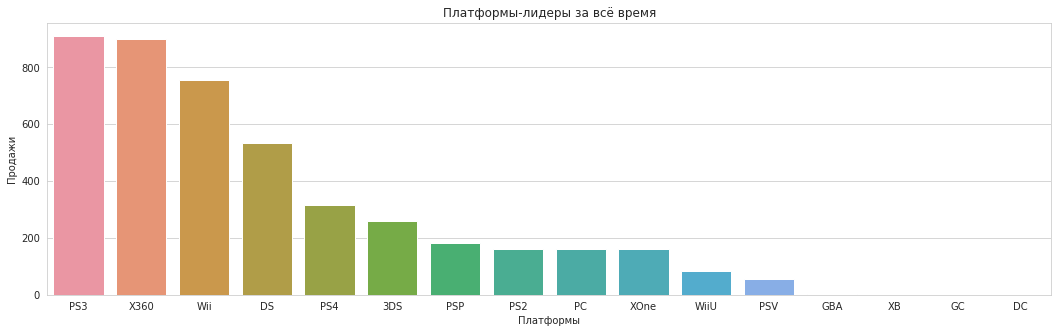

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2016_pvt, x='platform', y='sales_total')
plt.title('Платформы-лидеры за всё время')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

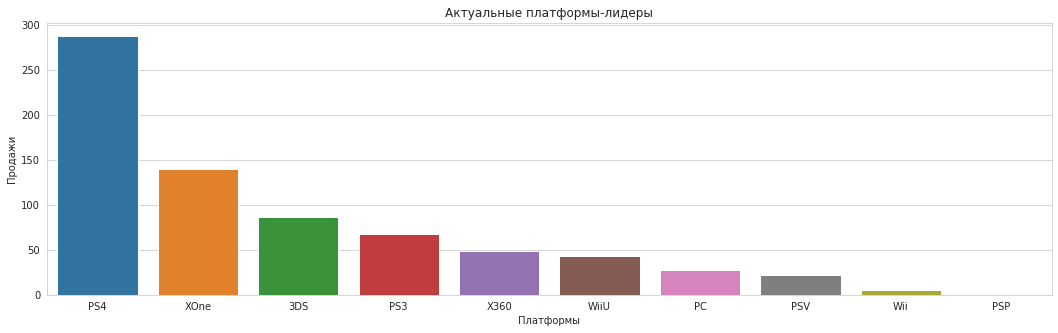

In [18]:
actual_data2 = data.query('year_of_release > 2013')
actual_2016_pvt = actual_data2.pivot_table(index=['platform'], values='sales_total', aggfunc='sum').reset_index().sort_values(by='sales_total', ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2016_pvt, x='platform', y='sales_total')
plt.title('Актуальные платформы-лидеры')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Сейчас намного скучно, на конец 2016:
1. PS4
2. XONE
3. Nintendo 3DS

Причем, что продаж меньше, чем на предыдущие поколения.


### Ящик с усами

In [19]:
def sales_boxplot(title=None, query_condition = None, ylims=None):
    
    if query_condition == None:
        ax = data.boxplot(column='sales_total', fontsize=25, figsize=(25,10))
                                         
    else:
        df_query = data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10))
                                         
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25)

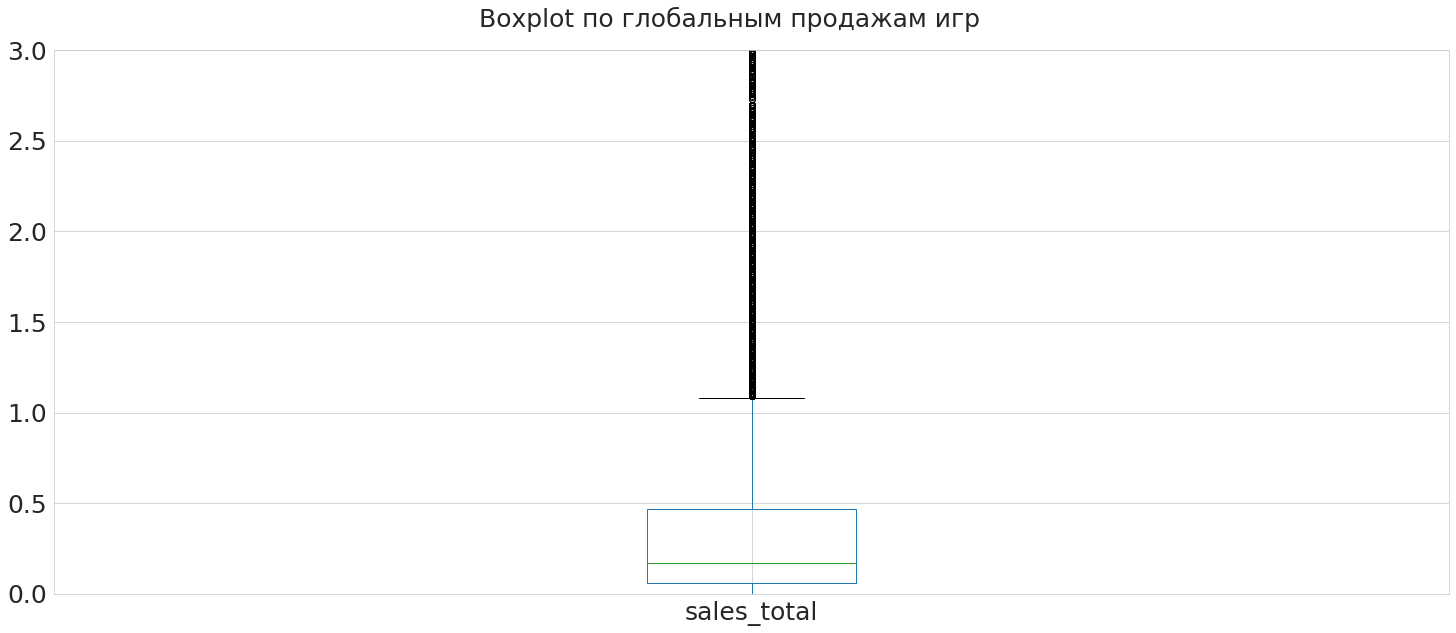

In [20]:
sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,3])

* В верхнем пределе продажи были чуть больша 1 млн. долл.
* Медианное значение на уровне 0.2 - 0.3 млн. долл.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


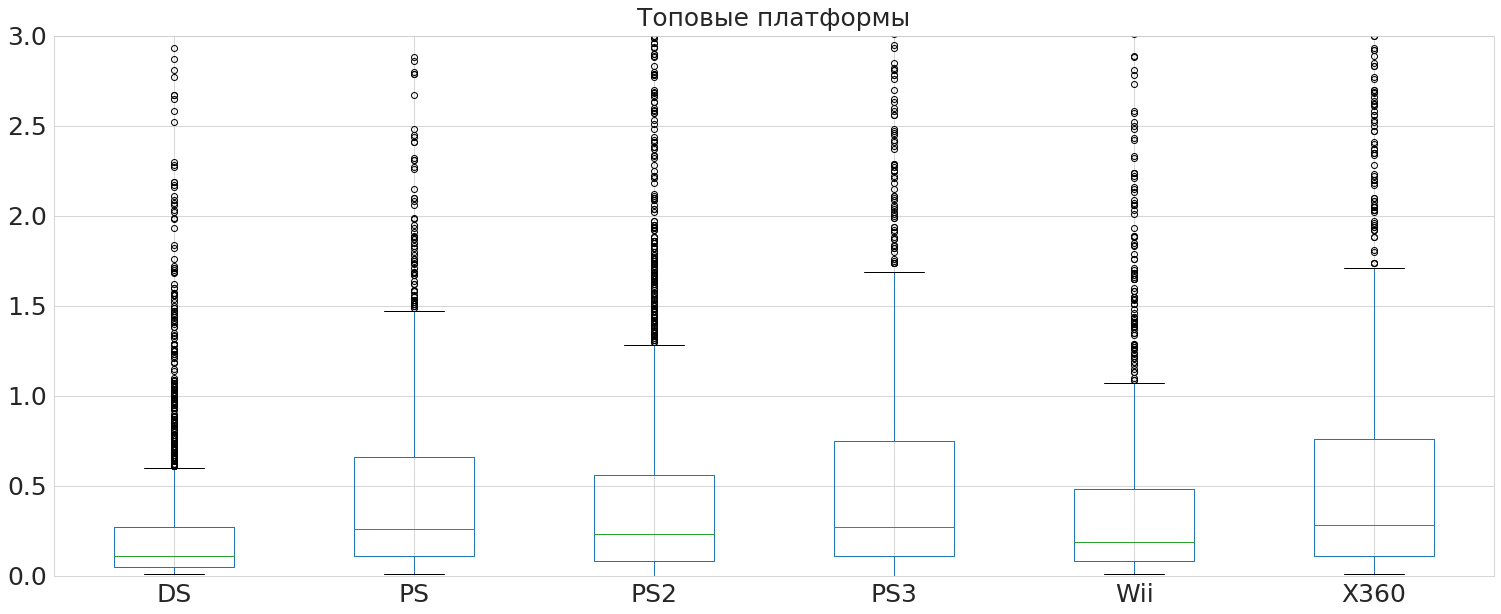

In [21]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
sales_boxplot('Топовые платформы', query_condition="platform in @top_platforms", ylims=[0,3])

### Влияние отзывов критиков и игроков
Возьму платформу PS3 - самая популярная, игр больше, данных больше.

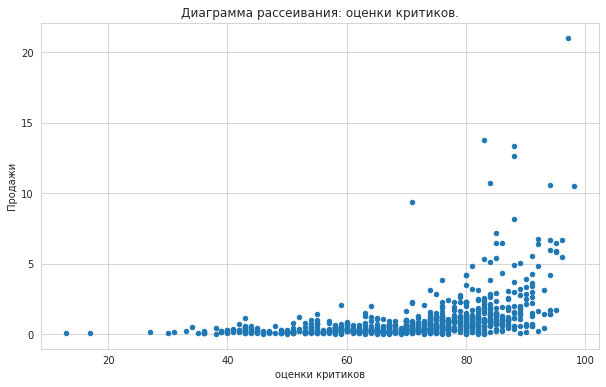

In [22]:
# Диаграмма рассеивания: оценки критиков.
games_ps3 = data[(data['platform'] == 'PS3') & (data['critic_score'] > 0)].copy()
games_ps3 = data[(data['platform'] == 'PS3') & (data['critic_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))
plt.title('Диаграмма рассеивания: оценки критиков.')
plt.xlabel('оценки критиков')
plt.ylabel('Продажи')
plt.show()

Чем выше критики оценивают игру, тем больше продажи

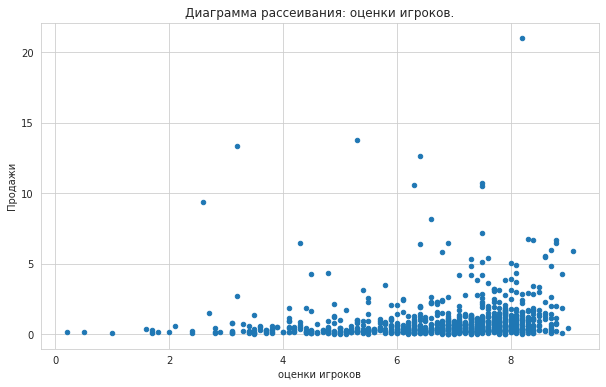

In [23]:
# Диаграмма рассеивания: оценки игроков.
games_ps3 = data[(data['platform'] == 'PS3') & (data['user_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='user_score', y='sales_total', figsize=(10,6))
plt.title('Диаграмма рассеивания: оценки игроков.')
plt.xlabel('оценки игроков')
plt.ylabel('Продажи')
plt.show()

В целом результаты схожи, но выбросов больше. Скорее всего игроки больше импульсивны на серийные игры (NFC, FIFA,Assassin's Creed и т.п.), а потому сначала покупают, потом расстраиваются. 

#### Что больше имеет влияния на продажи: критики или игроки?

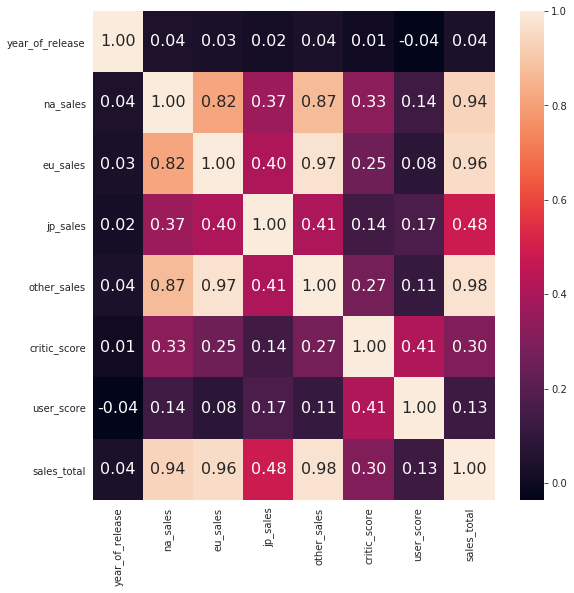

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(games_ps3.corr(), annot=True, fmt='.2f', annot_kws={'size':16})

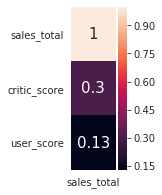

In [25]:
games_ps3_filtered = games_ps3[['sales_total' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(games_ps3_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
            annot=True, annot_kws={'size':15})

Влияние критиков является определяющим, оценки игроков меньше влияют на продажи. Можно сказать, что критики более беспристрастны во взглядах, обычный игрок подтвержен больше внутренним порывам, что увеличивает субъективность в оценке, тем самым снижает качество мнения.

### Корреляция на платформах.

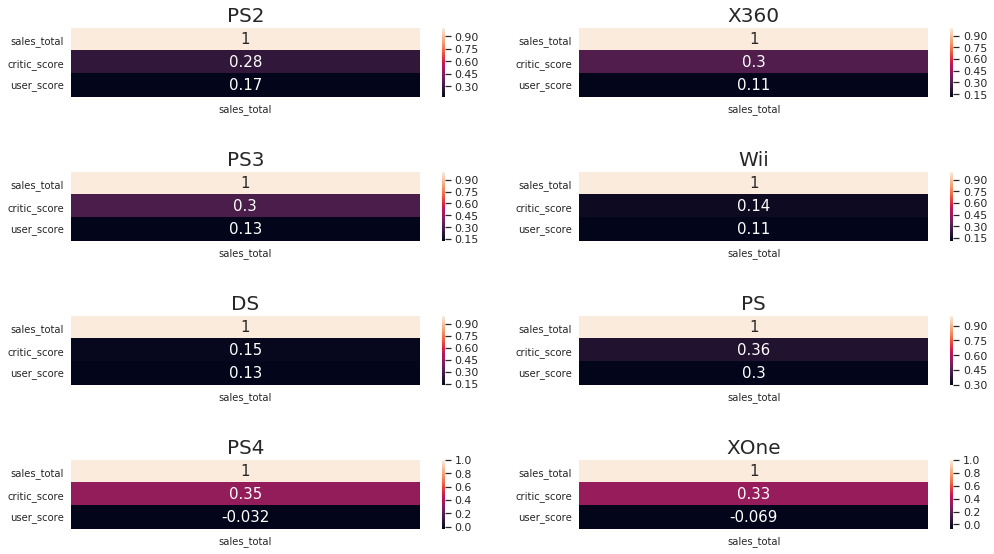

In [26]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = data[(data['platform'] == curr_platform) & (data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

1. В целом продажи также зависимы от оценки критиков.
2. Кроме платформ Nintendo - Wii и DS показывают идентичные оценки критиков и игроков, значит продажи, странным образом, менее подтвержены оценочным суждениям. 
3. Что интересно кончоли нового поколения PS4 и XONE менее подтвержены влиянию оецнки игроков, может сами игроки еще привыкали к играм на новых платформах на тот момент.

### Продажи по жанрам.

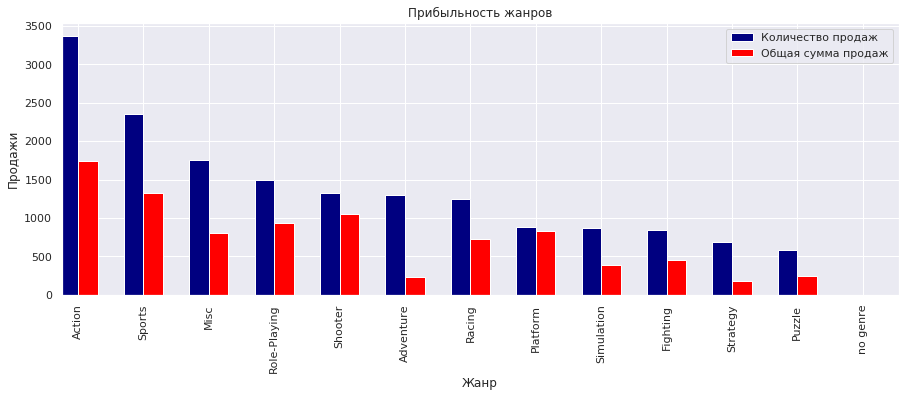

In [27]:
ax = plt.gca()

pivot = data.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)
#названия игр
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ax=ax, width=0.3, color='#000080', position=1)
#количество продаж
plot2 = pivot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ax=ax, width=0.3, color='#ff0000', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.title('Прибыльность жанров')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

### Вывод по Шагу №3:
1. Игровая индустрия родилась в 80-х, расти начала в 90-х, пик роста конец 00-х. Сейчас наблюдается спад.
2. За весь период PS2 самая популярная платформа.
3. В среднем платформы живут максимум 10 лет, пиковость в 7-8 лет.
4. Новые платформы живут в 6 лет с пиковостью в 3 года.
5. Сегодня игр продается меньше чем раньше.
6. В глобальной перспективе продается в среднем на ~1 млн. долл.
7. Критики имеют больше влияния на продажи.
8. На платформах Nintendo (DS и Wii) низкое влияние оценок. 

## Шаг 4. Составьте портрет пользователя каждого региона


### Популярность платформ в регионах:


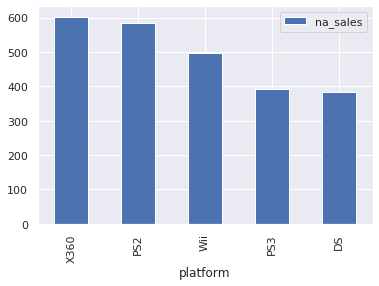

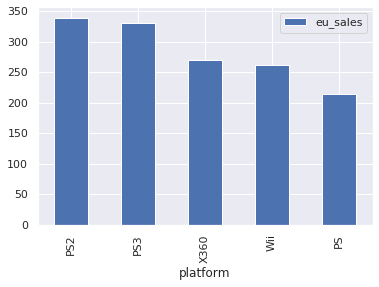

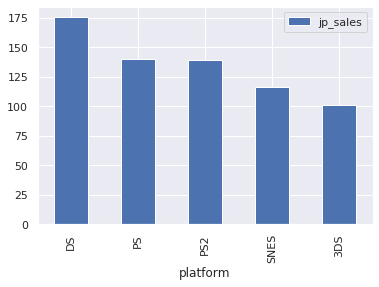

In [28]:
data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar') 
data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar') 
data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

1. В Америке больше предпочитают Xbox - больше функций для американских пользователей (TV, TV, TV, TV)
2. В Европе традиционно Playstation, и как третий вариант Xbox
3. Японцы патриотичны в выборе платформ.

### Популярность жанров в регионах:

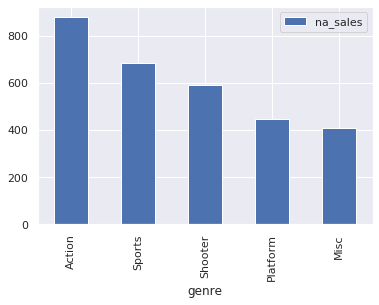

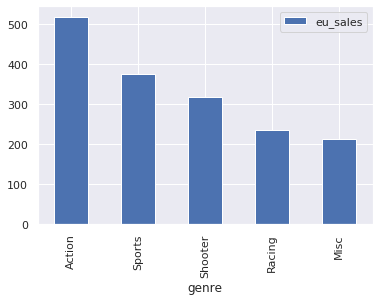

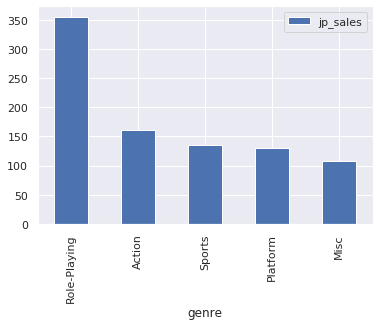

In [29]:
data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

1. В Америке и Европе отдают предпочтение Экшену и Спортивным симуляторам.
2. 4-ые места в Америке и Европе разные - В Европе любят гоночные симуляторы, в Америке - платформеры.
3. Японцы больше любят RPG.

### Влияние возраста в регионах:

In [30]:
ESRB = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устарело)'}

In [31]:
data['ESRB_rate'] = data[data['rating'].notnull()]['rating'].map(ESRB)

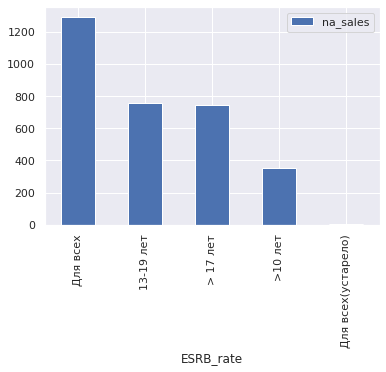

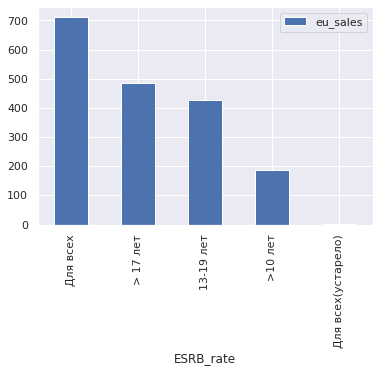

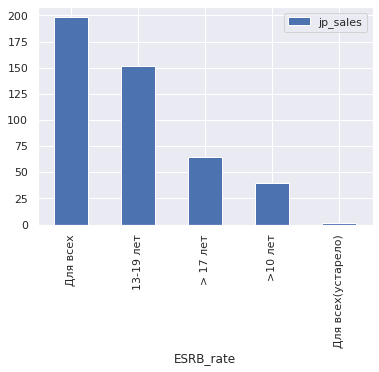

In [32]:
data.groupby(by='ESRB_rate').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='ESRB_rate').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='ESRB_rate').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

1. Преобладают игры для всех возрастов.
2. В Японии и Америке больше игр для подростков.
3. В Европе больше игр от 17 лет.

## Шаг 5. Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [33]:
alpha = 0.05

In [34]:
xbox_one_ratings = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc_ratings = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']
results = st.ttest_ind(xbox_one_ratings, pc_ratings)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


In [35]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 7.06


Логично, что после всего того, что Microsoft сделало с XONE игроки меньше удовлетворны платформой - эксклюзивов нет, а некоторые сервисы не работают за пределами США.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: средний пользовательский рейтинг жанров Action и Sports различается
 

In [36]:
alpha = 0.05
action = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


In [37]:
print('Средняя оценка пользователей игр жанра Action  - {:.2f}'.format(action.mean()))
print('Средняя оценка пользователей игр жанра Sports - {:.2f}'.format(sports.mean()))

Средняя оценка пользователей игр жанра Action  - 7.05
Средняя оценка пользователей игр жанра Sports - 6.96


Разница 0.09 не значит вообще ничего, значит игроки оценивают игры жанров Action и Sports одинаково.

## Шаг 6. Общий вывод по проекту:
1. Все прпоуски были заполнены.
    * user_score и critic_score - заменю на -1, т.к. оценку ноль поставить еще можно, а -1 нет.
    * tbd - тот же самый Nan, так что заменям и не переживаем.
2. В среднем платформы живут по 10 лет, с пиковостью в 7-8 лет
    * Платформы нового поколения вообще мало прожили 6-7 лет, с пиковостью в 3-4 года
        * Вырос бюджет разработки игр и требовательность к железу.
    * Критики имеют больший вес в итоговых продажах.
3. Спортивные симуляторы всотребованы.
    * Не только в виде игр-симуляторов (Fifa, NFC, NBA, etc.), но в виде живой активности Wii и Kinect.
4. Японцы более консервативны в выборе игровой платформы + больше предпочитают ролевые игры.
5. В Европе большей спрос на игры для людей старше 17 лет.
6. Наблюдается кризис платформ: между Xone и PC выберут PC, т.к. целесообразности в покупке консоли практически нет (нет эксклюзивов, да и сервисы не везде доступны).
7. Action и Sport выступают такими флагманами компаний - их больше покупают, значит на каждую последующую часть тратися больше денег для добавления различных нововедений и увеличение детализации игрового процесса. 
8. Вместе с этим эти два жанра идентчины по оценкам.

### Рекомендации:
1. Охота за технологиями в игровом процессе отпугивает обычных пользователей, которые помнят игры по старым платформерам и условным сюжетам - потому нужно сново вводить в моду казуальные игры.
2. Спортивные симуляторы можно развить до уровня VR и объединить с уже существующим Kinect, как это сделали Sony связав VR и Playstation Move.
3. Развить мобильный гейминг до уровня игр портативных консолей. Хотя революцию сегодня совершила Nintendo со своей консолю Switch. 